In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from matplotlib.patches import Ellipse

# For reproducibility
np.random.seed(1000)


nb_samples = 300
nb_centers = 2


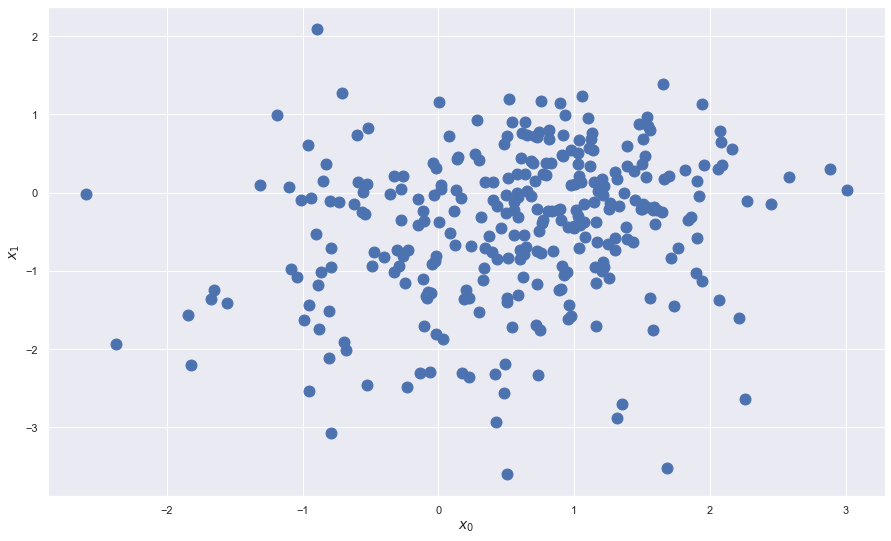

In [3]:
X, Y = make_blobs(n_samples=nb_samples, n_features=2, center_box=[-1, 1], centers=nb_centers,
                      cluster_std=[1.0, 0.6], random_state=1000)

# Show the dataset
sns.set()

fig, ax = plt.subplots(figsize=(15, 9))

ax.scatter(X[:, 0], X[:, 1], s=120)

ax.set_xlabel(r'$x_0$', fontsize=14)
ax.set_ylabel(r'$x_1$', fontsize=14)

plt.show()

In [5]:
# Train the model
gm = GaussianMixture(n_components=2, random_state=1000)
gm.fit(X)
Y_pred = gm.fit_predict(X)

print('Means: \n{}'.format(gm.means_))
print('Covariance matrices: \n{}'.format(gm.covariances_))
print('Weights: \n{}'.format(gm.weights_))

m1 = gm.means_[0]
m2 = gm.means_[1]

c1 = gm.covariances_[0]
c2 = gm.covariances_[1]

we1 = 1 + gm.weights_[0]
we2 = 1 + gm.weights_[1]

# Eigendecompose the covariances
w1, v1 = np.linalg.eigh(c1)
w2, v2 = np.linalg.eigh(c2)

nv1 = v1 / np.linalg.norm(v1)
nv2 = v2 / np.linalg.norm(v2)

print('Eigenvalues 1: \n{}'.format(w1))
print('Eigenvectors 1: \n{}'.format(nv1))

print('Eigenvalues 2: \n{}'.format(w2))
print('Eigenvectors 2: \n{}'.format(nv2))

a1 = np.arccos(np.dot(nv1[:, 1], [1.0, 0.0]) / np.linalg.norm(nv1[:, 1])) * 180.0 / np.pi
a2 = np.arccos(np.dot(nv2[:, 1], [1.0, 0.0]) / np.linalg.norm(nv2[:, 1])) * 180.0 / np.pi

Means: 
[[ 0.97121896 -0.01679101]
 [-0.02171304 -1.03295837]]
Covariance matrices: 
[[[ 0.44075382  0.02378036]
  [ 0.02378036  0.37802115]]

 [[ 0.86794212 -0.18290731]
  [-0.18290731  1.06858097]]]
Weights: 
[0.60316101 0.39683899]
Eigenvalues 1: 
[0.37002567 0.4487493 ]
Eigenvectors 1: 
[[ 0.22534853 -0.6702373 ]
 [-0.6702373  -0.22534853]]
Eigenvalues 2: 
[0.75964929 1.17687379]
Eigenvectors 2: 
[[-0.608459   -0.36024664]
 [-0.36024664  0.608459  ]]


P([0, -2]=G1) = 0.013 and P([0, -2]=G2) = 0.987
P([1, -1]=G1) = 0.646 and P([1, -1]=G2) = 0.354
P([1, 0]=G1) = 0.932 and P([1, 0]=G2) = 0.068


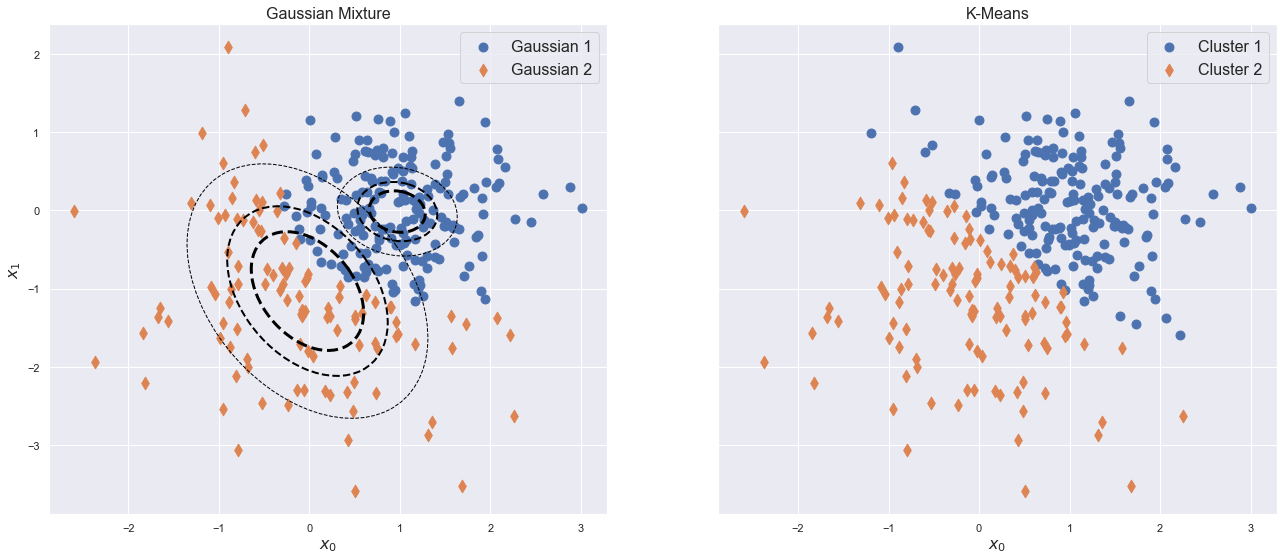

In [6]:
# Perform K-Means clustering
km = KMeans(n_clusters=2, random_state=1000)
km.fit(X)
Y_pred_km = km.predict(X)

# Show the comparison of the results
fig, ax = plt.subplots(1, 2, figsize=(22, 9), sharey=True)

ax[0].scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s=80, marker='o', label='Gaussian 1')
ax[0].scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s=80, marker='d', label='Gaussian 2')

g1 = Ellipse(xy=m1, width=w1[1] * 3, height=w1[0] * 3, fill=False, linestyle='dashed', angle=a1, color='black',
             linewidth=1)
g1_1 = Ellipse(xy=m1, width=w1[1] * 2, height=w1[0] * 2, fill=False, linestyle='dashed', angle=a1, color='black',
               linewidth=2)
g1_2 = Ellipse(xy=m1, width=w1[1] * 1.4, height=w1[0] * 1.4, fill=False, linestyle='dashed', angle=a1,
               color='black', linewidth=3)

g2 = Ellipse(xy=m2, width=w2[1] * 3, height=w2[0] * 3, fill=False, linestyle='dashed', angle=a2, color='black',
             linewidth=1)
g2_1 = Ellipse(xy=m2, width=w2[1] * 2, height=w2[0] * 2, fill=False, linestyle='dashed', angle=a2, color='black',
               linewidth=2)
g2_2 = Ellipse(xy=m2, width=w2[1] * 1.4, height=w2[0] * 1.4, fill=False, linestyle='dashed', angle=a2,
               color='black', linewidth=3)

ax[0].set_xlabel(r'$x_0$', fontsize=16)
ax[0].set_ylabel(r'$x_1$', fontsize=16)

ax[0].add_artist(g1)
ax[0].add_artist(g1_1)
ax[0].add_artist(g1_2)
ax[0].add_artist(g2)
ax[0].add_artist(g2_1)
ax[0].add_artist(g2_2)

ax[0].set_title('Gaussian Mixture', fontsize=16)

ax[0].legend(fontsize=16)

ax[1].scatter(X[Y_pred_km == 0, 0], X[Y_pred_km == 0, 1], s=80, marker='o', label='Cluster 1')
ax[1].scatter(X[Y_pred_km == 1, 0], X[Y_pred_km == 1, 1], s=80, marker='d', label='Cluster 2')

ax[1].set_xlabel(r'$x_0$', fontsize=16)

ax[1].set_title('K-Means', fontsize=16)

ax[1].legend(fontsize=16)

# Predict the probability of some sample points
print('P([0, -2]=G1) = {:.3f} and P([0, -2]=G2) = {:.3f}'.format(*list(gm.predict_proba([[0.0, -2.0]]).squeeze())))
print('P([1, -1]=G1) = {:.3f} and P([1, -1]=G2) = {:.3f}'.format(*list(gm.predict_proba([[1.0, -1.0]]).squeeze())))
print('P([1, 0]=G1) = {:.3f} and P([1, 0]=G2) = {:.3f}'.format(*list(gm.predict_proba([[1.0, 0.0]]).squeeze())))

plt.show()

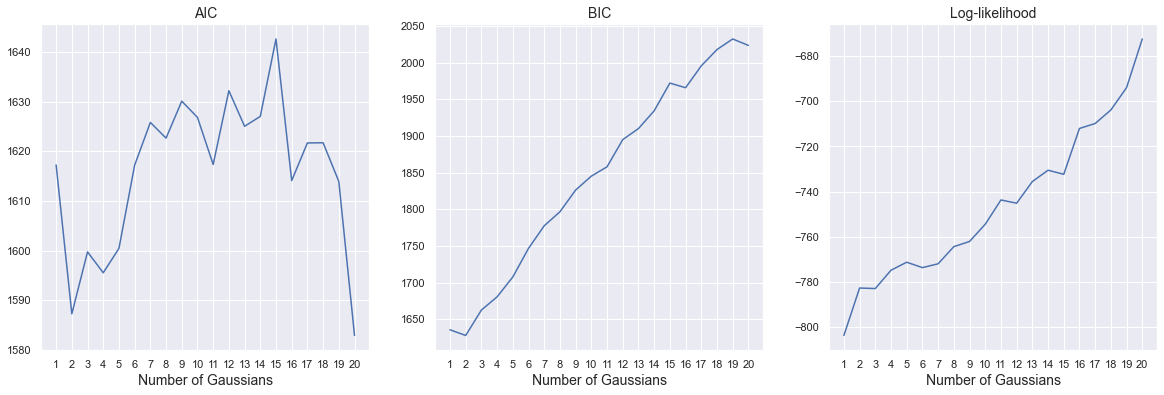

In [7]:
# Compute AICs, BICs, and log-likelihood
n_max_components = 20

aics = []
bics = []
log_likelihoods = []

for n in range(1, n_max_components + 1):
    gm = GaussianMixture(n_components=n, random_state=1000)
    gm.fit(X)
    aics.append(gm.aic(X))
    bics.append(gm.bic(X))
    log_likelihoods.append(gm.score(X) * nb_samples)

# Show the results
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].plot(range(1, n_max_components + 1), aics)
ax[0].set_xticks(range(1, n_max_components + 1))

ax[0].set_xlabel('Number of Gaussians', fontsize=14)
ax[0].set_title('AIC', fontsize=14)

ax[1].plot(range(1, n_max_components + 1), bics)
ax[1].set_xticks(range(1, n_max_components + 1))

ax[1].set_xlabel('Number of Gaussians', fontsize=14)
ax[1].set_title('BIC', fontsize=14)

ax[2].plot(range(1, n_max_components + 1), log_likelihoods)
ax[2].set_xticks(range(1, n_max_components + 1))

ax[2].set_xlabel('Number of Gaussians', fontsize=14)
ax[2].set_title('Log-likelihood', fontsize=14)

plt.show()